### Unsupervised Learning in Artificial is a type of machine learning that learns from data without human supervision. 

Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insight without any explicit guidance or instruction 

Unsupervised learning is a technique of learning the patterns without any label or assistance

We can use our Business sense to judge whether the prediction are good or not

## Clustering Analysis

Clustering Analysis is a branch of unsupervised ML 

Clustering is a technique that involves grouping of similar data point

Classify each data point into a specific group

Data points that are in the same group should exhibit similar features, while data points in different groups exhibit dissimilar properties and features

## Types of Clustering Analysis

#### Hard Clustering
Each data point either belongs to a Cluster completely or not
This means that every data point will belong to one and only one cluster at a time


#### Soft Clustering
Each data point can belong to Multiple cluster ata the same time
This means data points can be associated to multiple Clusters at the same time 


In most cases we prefer hard Cluster, as we want data points to be in one cluster only

Apart from hard and soft clustering we also have some other clustering

#### Connectivity Based Clustering Models
This model work on the basis of distance and assume thet if the two data point are closer to each other they are similar to each Other.
The Data point lying closer to each other will  be grouped together in one cluster, and the data points lying far from each other will be separated in different clusters. 


#### Centriods Based Clustering Models 
These Models work on the notion that similarity is derived by the closeness of a data point to the centriod of the clusters.
The points will be divide into different clusters based on the closeness to a centriod.
One of the most famous algorithms that fall under this category os Kmeans Algorithm


#### Density Based Clustering Models
These Models cluster the data points by finding areas of varied density, and assigning data points to these different density regions

One of the most famous Algorithm that falls under this category is DBSCAN

### K Means Clustering

K means algorithm is a Centriod Based Algorithm

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observertions into k cluster in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster


It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different as possible

it also assign data points to a cluster such that the sum of the squared distance between the data points and the clusters centriod minimum

Using the elbow method to choose the best value for k 

'K' in K means algorithm simple means the number of clusters we want from our data

so we need to find the optimal of k

The elbow method is heuristic used in determining the number of optimum clusters in a dataset

The method helps us to find out the optimum number of clusters in a dataset

we plot the explained variation against the number of clusters and finally pick the elbow of the curves as the number of cluster to use

if we have multiple elbow in the curve we will have to pick the last elbow


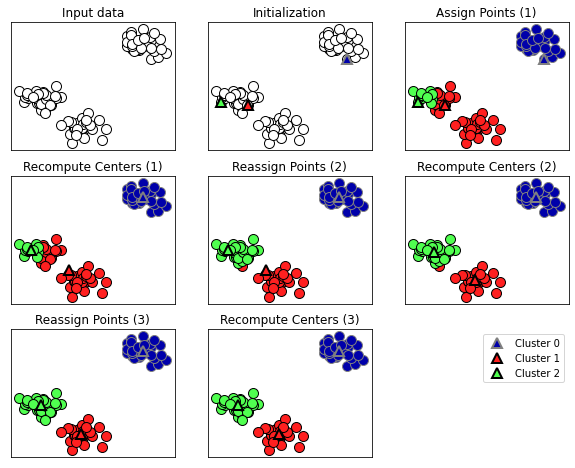

In [1]:
# A code sample to visualize how k-means work is mglearn library

import warnings
import mglearn

warnings.filterwarnings('ignore')

mglearn.plots.plot_kmeans_algorithm()

### Using K-means to solve a problem (Customer Classification)

In [2]:
# importing all required library

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# Reading the dataset 
data = pd.read_csv('Mall_Customers.csv')

# Lets check the shape of the data
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

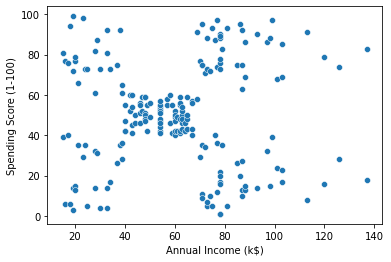

In [5]:
# find the distinct groups of customer present in the mall data 

# let us take a look at the relationship of annual income and spending score

sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'])

In [6]:
# We are making an array of two columns, which consist of annual income and spending score

x = data.loc[:, ['Annual Income (k$)' , 
                 'Spending Score (1-100)']].values

# let check the shape of X

print(x.shape)

(200, 2)


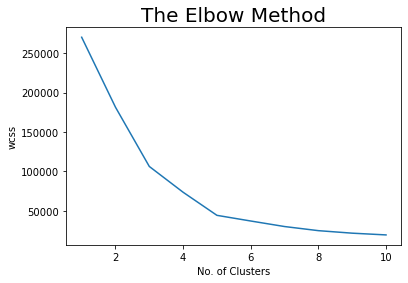

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init= 'k-means++',
                max_iter= 300,
                n_init=10, 
                random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

## Silhouette Values

The silhouette values help us evaluate our clusters

Silhouette values lie in the range of -1 and 1.The value of +1 is ideal and -1 is least preferred.

Value of +1 indicates that the sample is far away from its neighbouring cluster and very close to the cluster it is assigned

Value of -1 indicates that the point is close to its neighbouring cluster than to the cluster its assigned

Value of 0 means it is at the boundary of the distance between the two clusters.

### Working of silhouette Analysis

It measures the quality of a clustering. That is, it determines how well each object lies within its cluster

The optimal number of clusters of k is the one that maximizes the average silhouette over a range of possible values for k



In [8]:
from sklearn.metrics import silhouette_score

# Calculate the score
score = silhouette_score(x, km.labels_, metric='euclidean')

# Print the score
print('Silhouette score : %.3f' % score)

Silhouette score : 0.448


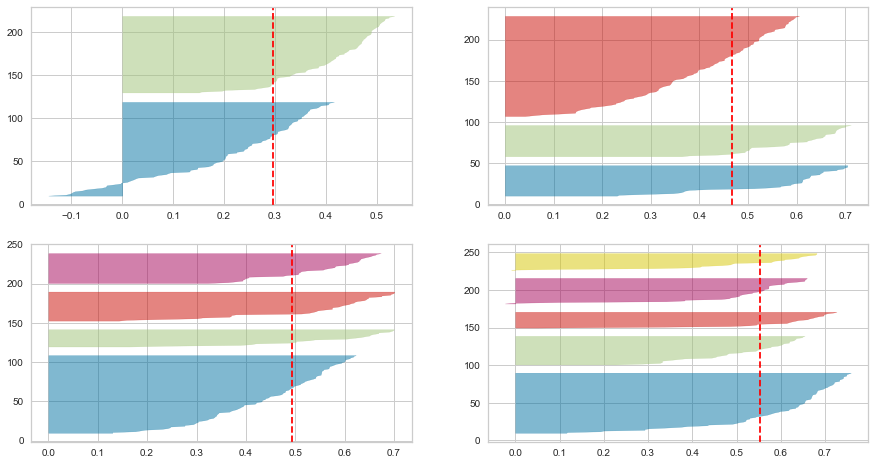

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(2 ,2 ,figsize=(15, 8))
for i in [2,3,4,5]:
    # create Kmeans instance for different number of clusters
    km= KMeans(n_clusters = i, init='k-means++', 
               n_init= 10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #create silhouette visualizer with kmeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', 
                                       ax=ax[q-1][mod])
    visualizer.fit(x)

### Clustering Multiple Dimensions

In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
a = data.loc[:, ['Age', 'Annual Income (k$)',
            'Spending Score (1-100)']].values


# lets check the shape of x
print(a.shape)

(200, 3)


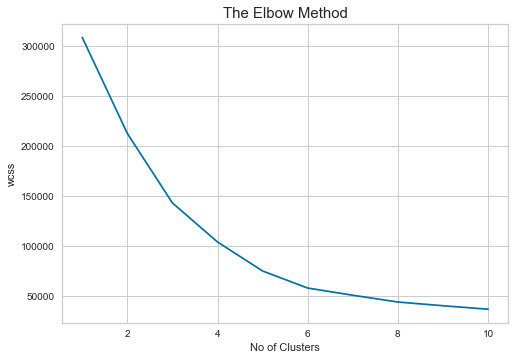

In [12]:
from sklearn.cluster import KMeans
    
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', 
                max_iter=300, n_init= 10, random_state=0)
    km.fit(a)
    wcss.append(km.inertia_)
    
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
# Performing Kmeans Clustering Analysis

km = KMeans(n_clusters=6, init='k-means++', 
            max_iter=300, n_init=100, random_state=0)
y_means = km.fit_predict(a)

In [14]:
y_means = pd.DataFrame(y_means)

df = pd.concat([data, y_means], axis=1)

df = df.rename(columns = {0:'Clusters'})

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [15]:
print('Customer IDs for Cluster1: ', df[df['Clusters'] == 1]['CustomerID'].values)
print('Customer IDs for Cluster2: ', df[df['Clusters'] == 2]['CustomerID'].values)
print('Customer IDs for Cluster3: ', df[df['Clusters'] == 3]['CustomerID'].values)
print('Customer IDs for Cluster4: ', df[df['Clusters'] == 4]['CustomerID'].values)
print('Customer IDs for Cluster5: ', df[df['Clusters'] == 5]['CustomerID'].values)


Customer IDs for Cluster1:  [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
Customer IDs for Cluster2:  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
Customer IDs for Cluster3:  [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]
Customer IDs for Cluster4:  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
Customer IDs for Cluster5:  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


## Hierarchical Clustering

It is an algorithm that groups similar objects into groups clusters

The endpoint is a set of clusters, where each cluster is distinct from each other cluster


### Types of Hierachical Clustering

Divisive

Agglomerative



#### Divisive Method

Top-down clustering Method

Assign all of the observations to a single cluster and then partition the cluster to two least similar clusters

Proceed recursively on each cluster until there is one cluster for each observation

Produce more accurate heirachies than agglomerative algorithms in some circumstances but are conceptually more complex


#### Agglomerative Method

Buttom-up clustering method

Assign each observation to its own cluster

Compute the similarity (e.g distance) between each of the cluster and join the two most similar clusters


### Methods for Computing Distance

There are three different methods which differ in how the distance between each cluster is measured

Single Linkage

Complete Linkage

Average Linkage

##### Single Linkage

Distance between two cluster is defined as the shortest distance between two points in each cluster.

For instance: the distance between clusters 'r' and 's' to the left is equal to the length of the arrow between their two closest points


##### Complete Linkage

Distance between two cluster is defined as the longest distance between two points in each cluster.

For instance: the distance between clusters 'r' and 's' to the left is equal to the length of the arrow between their two furthest points


##### Average Linkage

Distance between two cluster is defined as the average distance between each  points in one cluster to every point in the other cluster

For instance: the distance between clusters 'r' and 's' to the left is equal to the average length of each arrow connecting the points of one cluster to the other.


### Note: We cannot use the elbow method for deciding the optimal number of cluster, we have to use dendograms

### Dendograms

A Dendogram is a diagram that show the hierachical relationship between objects

it is most commonly created as an output from hierachical clustering

The main use of the dendogram is to work out the best way to allocate objects of clusters

In [16]:
x = data.loc[:, ['Annual Income (k$)',
            'Spending Score (1-100)']].values

# lets us check the shape of x
print(x.shape)

(200, 2)


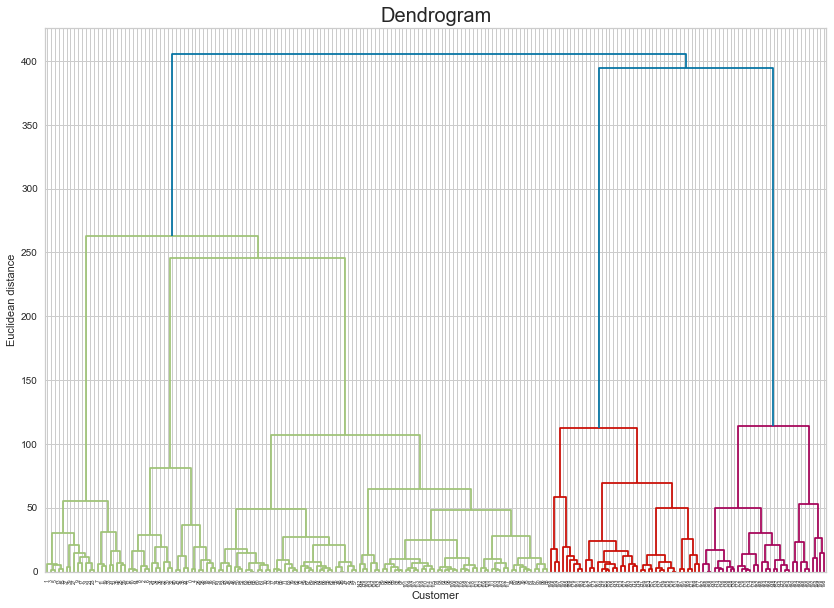

In [17]:
# plottind a dendogram 

import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (14, 10)

dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
# Implementing the Hierachical Clustering 

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(x)

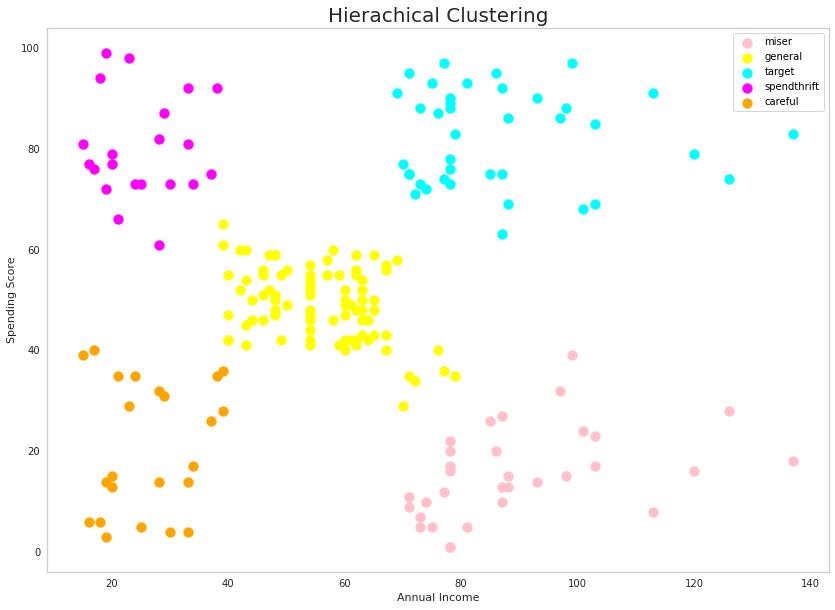

In [19]:
# Visualizing the cluster

plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='pink', label = 'miser')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='yellow', label = 'general')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='cyan', label = 'target')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1], s=100, c='magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4,1], s=100, c='orange', label = 'careful')


plt.style.use('default')
plt.rcParams['figure.figsize']= (15,5)
plt.title('Hierachical Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Introductioninto DBSCAN clustering

DBSCAN stands Density-Based spatial clustering of applications with noise

DBSCAN groups together points that are close to each other based on adistance measurement and a minimum of points

It basically require two parameters which are Eps and Minpoints

EPS: specifies how close points should be to each other to be considered a part of a cluster

This Value will be considered as a threshold for considering two points as a neighbour.


MINPOINTS: is the minimum number of points to form a dense region.


Generally the number of minpoints is equal to twice the number of columns in the dataset





## Types of Points for DBSCAN cluster
There are three types of points after the DBSCAN clustering is complete

1) Core: It is a point that has at least m points within distance n from itself

2) Border: This is a point that has at least on core point at a distance n

3) Noise: which is a point that is neither a core nor a Border. And it has less than m points withnin distance n from itself.

### DBSCAN ALGORITHM STEPS

Step 1: Find all the neighbour points within eps and identify the core points or visited with more than minpts neighbour

Step 2: For each core point if it is not assigned to a cluster, create a new cluster

Step 3: Find recursively all its density connected points and assign them to the same cluster as the core point.

Step 4: Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

In [20]:
# Implenting DBSCAN algorithm

x = data.loc[:, ['Annual Income (k$)', 
                'Spending Score (1-100)']].values

# Lets check the shape of x
print(x.shape)

(200, 2)


We can calculate the distance from each point to its closest neighbour using NearestNeighbour

The point itself is included in n_neighbours.

The Kneighbours method returns two arrays 

One which contains the distance to the closest n_neighbours points and 

the other which contains the index for each of those points

In [21]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

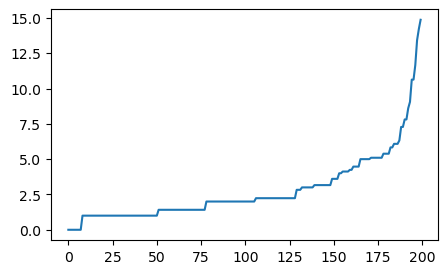

In [22]:
# sort and plot the results

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5, 3)
plt.plot(distances)
plt.show()

In [23]:
from sklearn.cluster import DBSCAN

# cluster the data into five cluster
dbscan = DBSCAN(eps=8, min_samples=4)
clusters = dbscan.fit_predict(x)

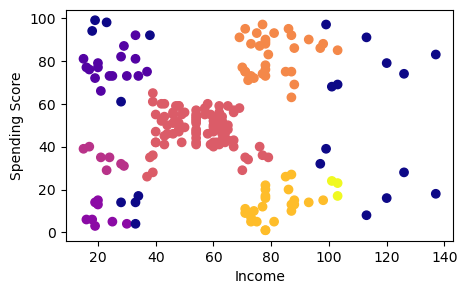

In [24]:
# plot the cluster assignment
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap='plasma')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

## Dimensionality Reduction

This is to understand why high dimensional data can give so much problem

Machine learning predictive models generally possess a high level of ovefitting when the number of columns are too much. This is because that there is a high probability that most of the columns are useless and give similar information

Dimensionality reduction technique help us to reduce or remove irrelevant or useless columns from the dataset and avoids overfitting

### Methods of Dimensionality Reduction

##### Correlation Filtering
The correlation of all columns with respect to all the columns and then find the pair of highly correlated columns

We remove one of the Highly correlated columns from the dataset to reduce the Dimension of the Dataset.

###### Variance inflattion Filtering
In this method,we calculate the variance for all the independent variables and after that we check the value of the variance for all the columns

Finally we remove or eliminate all those columns from the dataset where the variance comes out to be less than or equal to 5.

#### Feature selection Techniques
RFECV also known as Recursive Features Elimination with cross validation

Boruta algorithm that works with random forest algorithm

### Advanced Techniques

##### Principal Component Analysis.

##### T-SNE.

##### Linear Discriminant Analysis.

They are all Machine learning algorithms

In [25]:
data = pd.read_csv('Employee_Data.csv')

# lets check the shape of the dataset
data.shape

(1058, 35)

In [26]:
#lets check the top 5 rows of the dataset

pd.set_option('max_columns', 35)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [27]:
cols = list(data.columns)
cols
print("Number of Records in the Dataset: ", data.shape[0])

for col in cols:
    print('Number of unique values for {} is {}'.format(col, data[col].nunique()))

# So columns that have unique values with the total record are useless, like wise the column that has on one unique value

Number of Records in the Dataset:  1058
Number of unique values for Age is 43
Number of unique values for Attrition is 2
Number of unique values for BusinessTravel is 3
Number of unique values for DailyRate is 731
Number of unique values for Department is 3
Number of unique values for DistanceFromHome is 29
Number of unique values for Education is 5
Number of unique values for EducationField is 6
Number of unique values for EmployeeCount is 1
Number of unique values for EmployeeNumber is 1058
Number of unique values for EnvironmentSatisfaction is 4
Number of unique values for Gender is 2
Number of unique values for HourlyRate is 71
Number of unique values for JobInvolvement is 4
Number of unique values for JobLevel is 5
Number of unique values for JobRole is 9
Number of unique values for JobSatisfaction is 4
Number of unique values for MaritalStatus is 3
Number of unique values for MonthlyIncome is 991
Number of unique values for MonthlyRate is 1038
Number of unique values for NumCompa

In [28]:
for col in cols:
    if data[col].nunique() == 1:
        print('Number of unique values for {} is {}'.format(col, data[col].nunique()))
    elif data[col].nunique() == 1058:
        print('Number of unique values for {} is {}'.format(col, data[col].nunique()))
        
# So we have 4 useless columns

Number of unique values for EmployeeCount is 1
Number of unique values for EmployeeNumber is 1058
Number of unique values for Over18 is 1
Number of unique values for StandardHours is 1


In [29]:
# Let's remove these columns from the dataset

data= data.drop(['EmployeeCount', 'EmployeeNumber',
                'Over18', 'StandardHours'], axis=1)

# let's print our new data shape
print(data.shape)
print('we are now left with 31 columns')

(1058, 31)
we are now left with 31 columns


In [30]:
# let check for the missing values
data.isnull().sum().sum()

0

In [31]:
# let check the columns with object data types

data.select_dtypes('object').head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [32]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'BusinessTravel' is a categorical column in your DataFrame 'data'
le = LabelEncoder()
le.fit(data['BusinessTravel'])
data['BusinessTravel'] = le.transform(data['BusinessTravel'])

le.fit(data['Department'])
data['Department'] = le.transform(data['Department'])

le.fit(data['EducationField'])
data['EducationField'] = le.transform(data['EducationField'])

le.fit(data['Gender'])
data['Gender'] = le.transform(data['Gender'])

le.fit(data['JobRole'])
data['JobRole'] = le.transform(data['JobRole'])

le.fit(data['MaritalStatus'])
data['MaritalStatus'] = le.transform(data['MaritalStatus'])

le.fit(data['OverTime'])
data['OverTime'] = le.transform(data['OverTime'])

data.select_dtypes('object').columns

Index([], dtype='object')

In [33]:
# let split the target column attrition from the dataset

y= data['Attrition']
x= data.drop(['Attrition'], axis=1)


# lets check the shape of the dataset
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1058, 30)
Shape of y : (1058,)


In [34]:
# Let check the attrition column to see if the data is balanced
data['Attrition'].value_counts()

0    879
1    179
Name: Attrition, dtype: int64

In [35]:
# to balance the distribution we are going to use the smothen sampling technique

from imblearn.combine import SMOTEENN

#defining the model
sn = SMOTEENN(random_state=0)

#Training the model
sn.fit(x,y)

# making the samples

x,y = sn.fit_resample(x, y)

# class Distribution
y.value_counts()

1    574
0    435
Name: Attrition, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


print('The shape of xtrain is :', x_train.shape)
print('The shape of xtest is :', x_test.shape)
print('The shape of ytrain is :', y_train.shape)
print('The shape of ytest is :', y_test.shape)

The shape of xtrain is : (807, 30)
The shape of xtest is : (202, 30)
The shape of ytrain is : (807,)
The shape of ytest is : (202,)


In [37]:
# let create a predictive model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)

print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        85
           1       0.88      0.90      0.89       117

    accuracy                           0.87       202
   macro avg       0.86      0.86      0.86       202
weighted avg       0.87      0.87      0.87       202



# Correlation Filtering
Correlation is a statistical relationship between two variables. In the broadest sense it refers to the degree to which, a pair of varialbles are linearly related

## Introduction to correlation using Heatmap

A heatmap is a data visualization technique that shows the magnitude of a phenomenon as color in two dimensions. The variation in color may be by category or intensity

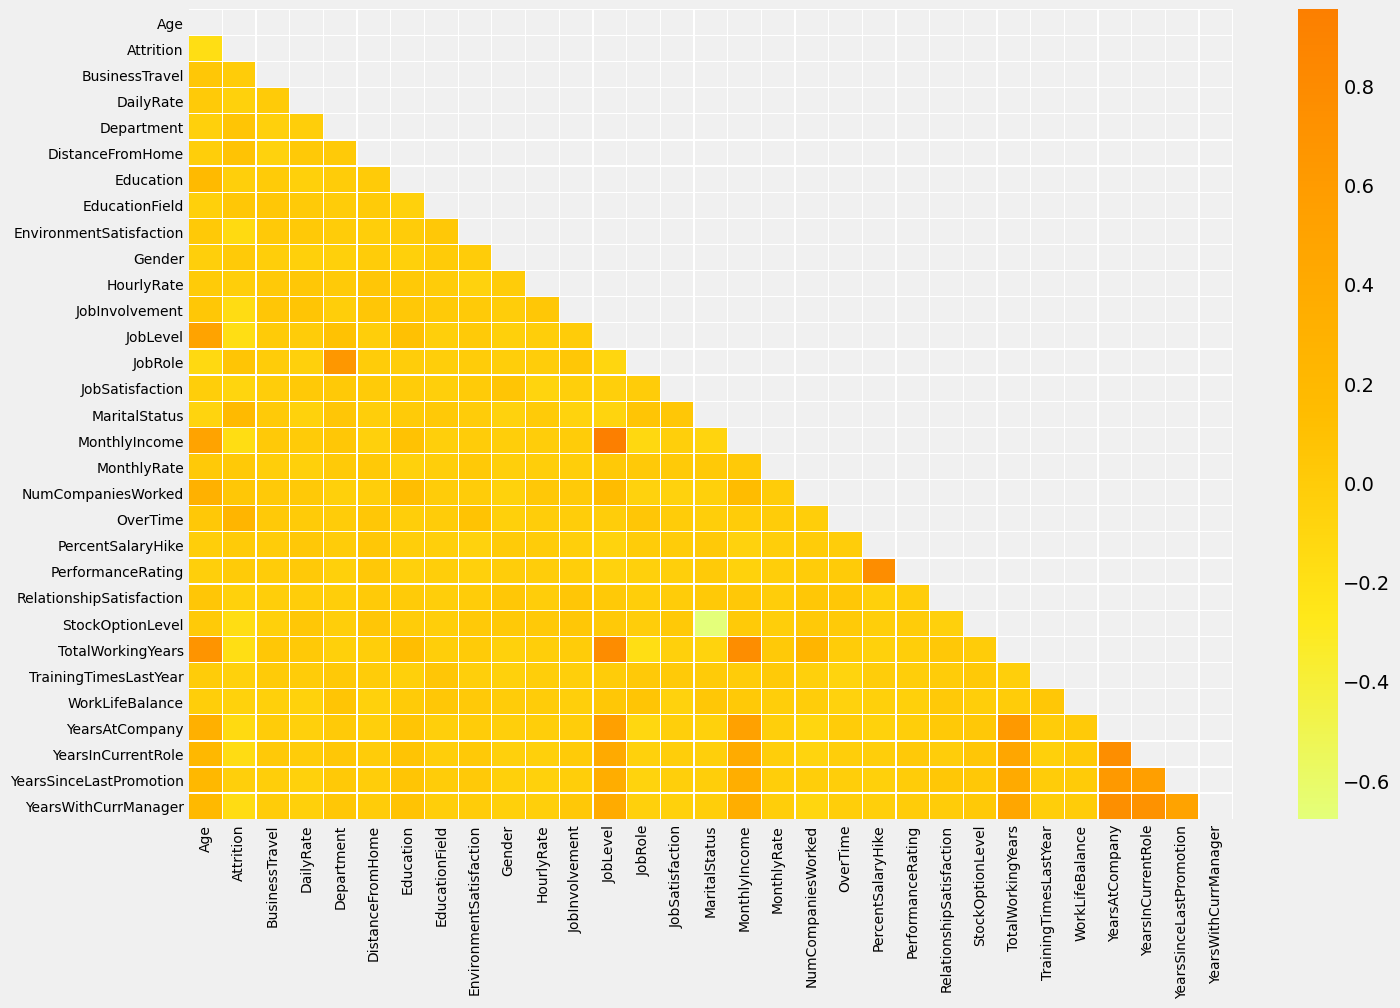

In [38]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='Wistia', linewidths=0.2)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Age is Highly correlated with Job Level, Monthly Income, and Total Working Year

Job Role and Department are Highly Correlated

Job level is Highly Correlated with Total Working and Monthly Income

Performance Rating and Percent Salary Hike are Highly Correlated

Years In Current Role is Highly Correlated with Years At Company and Years with Manager


In [39]:
# Lets Remove the highly correlated columnc from the datasets

data_cf = data.drop(['JobLevel', 'JobRole', 'PercentSalaryHike', 'TotalWorkingYears',
                    'YearsInCurrentRole', 'YearsWithCurrManager'], axis=1)

# lets check the shape of the dataset after removal of 5 columns from 35 columns
data_cf.shape

(1058, 25)

In [40]:
# let split the target column attrition from the dataset

y_cf= data_cf['Attrition']
x_cf= data_cf.drop(['Attrition'], axis=1)


# lets check the shape of the dataset
print("Shape of x :", x_cf.shape)
print("Shape of y :", y_cf.shape)

Shape of x : (1058, 24)
Shape of y : (1058,)


In [41]:
# to balance the distribution we are going to use the smothen sampling technique

from imblearn.combine import SMOTEENN

#defining the model
sn = SMOTEENN(random_state=0)

#Training the model
sn.fit(x_cf,y_cf)

# making the samples

x_cf,y_cf = sn.fit_resample(x_cf, y_cf)

# class Distribution
y_cf.value_counts()

1    573
0    435
Name: Attrition, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

x_train_cf, x_test_cf, y_train_cf, y_test_cf = train_test_split(x_cf, y_cf, test_size=0.2, random_state=0)


print('The shape of xtrain is :', x_train_cf.shape)
print('The shape of xtest is :', x_test_cf.shape)
print('The shape of ytrain is :', y_train_cf.shape)
print('The shape of ytest is :', y_test_cf.shape)

The shape of xtrain is : (806, 24)
The shape of xtest is : (202, 24)
The shape of ytrain is : (806,)
The shape of ytest is : (202,)


In [43]:
# let create a predictive model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()

model.fit(x_train_cf, y_train_cf)
y_pred = model.predict(x_test_cf)

cr = classification_report(y_pred, y_test_cf)

print(cr)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        80
           1       0.82      0.81      0.82       122

    accuracy                           0.78       202
   macro avg       0.77      0.77      0.77       202
weighted avg       0.78      0.78      0.78       202



# Variance Inflation Filtering (VIF)
VIF is a statistical technique which helps us to solve the problem of multicollinearity.
Multicollinearity is a problem which occurs when there are two or more independent variables

Removes all the features having High Variance

VIF above 5 indicates a high multicollinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe

vif_data = pd.DataFrame()
vif_data['features'] = x.columns

# calculating VIF for each features
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                  for i in range(len(x.columns))]

vif_data.style.background_gradient(cmap = 'Wistia')

,features,VIF
0,Age,31.744653
1,BusinessTravel,6.538744
2,DailyRate,5.679580
3,Department,11.652175
4,DistanceFromHome,2.511330
5,Education,9.856332
6,EducationField,4.227109
7,EnvironmentSatisfaction,6.840088
8,Gender,2.179135
9,HourlyRate,13.692474


In [45]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [46]:
# lets create the dependent and Non dependent sets 

x_vif = data[['DistanceFromHome', 'EducationField', 'Gender',
             'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
             'YearsSinceLastPromotion']]


y_vif = data['Attrition']

In [47]:
# to balance the distribution we are going to use the smothen sampling technique

from imblearn.combine import SMOTEENN

#defining the model
sn = SMOTEENN(random_state=0)

#Training the model
sn.fit(x_vif,y_vif)

# making the samples

x_vif,y_vif = sn.fit_resample(x_vif, y_vif)

# class Distribution
y_vif.value_counts()

1    578
0    414
Name: Attrition, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y_vif, test_size=0.2, random_state=0)


print('The shape of xtrain is :', x_train_vif.shape)
print('The shape of xtest is :', x_test_vif.shape)
print('The shape of ytrain is :', y_train_vif.shape)
print('The shape of ytest is :', y_test_vif.shape)

The shape of xtrain is : (793, 7)
The shape of xtest is : (199, 7)
The shape of ytrain is : (793,)
The shape of ytest is : (199,)


In [49]:
# let create a predictive model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()

model.fit(x_train_vif, y_train_vif)
y_pred = model.predict(x_test_vif)

cr = classification_report(y_pred, y_test_vif)

print(cr)

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        74
           1       0.92      0.86      0.89       125

    accuracy                           0.86       199
   macro avg       0.85      0.86      0.86       199
weighted avg       0.87      0.86      0.87       199



### Advance Feature selection technique for dimensionality Reduction

Feature selection is the process where we automatically or manually select those features which contribute most to our predictive model.

Having irrelevant features in the dataset can decrease the accuracy and efficiency of the predictive models most of the time.

Hence Feature selection method will help us select only the useful features for predictive analysis

### Recursive Feature Elimination

RFE is a wrapper based feature selection method

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remians

Core of the model, ranking features by importance, discarding the least important features, and re-fitting the model.

This process is repeated until a specified number of features remains.

Measure of variable importance is computed that ranks the predictors from most important to least.

The least important predictors are iteratively eliminated prior to rebilding the model

Features are scored either using the provided machine learning model such as some tree based Algorithms like Decision tree or random Forest which offer importance scores or by using a statistical methods

### Implementing Recursive Feature Selection with RFECV

In [50]:
from sklearn.feature_selection import RFECV

# The accuracy scoring is proportional to the number of correct classification
model = DecisionTreeClassifier()
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'PercentSalaryHike',
       'StockOptionLevel', 'WorkLifeBalance', 'YearsInCurrentRole'],
      dtype='object')


In [51]:
# lets create the dependent and independents set for rfecv

x_rfecv = data[['JobLevel', 'MonthlyIncome', 'MonthlyRate']]
y_rfecv = data['Attrition']

In [52]:
# to balance the distribution we are going to use the smothen sampling technique

from imblearn.combine import SMOTEENN

#defining the model
sn = SMOTEENN(random_state=0)

#Training the model
sn.fit(x_rfecv,y_rfecv)

# making the samples

x_rfecv,y_rfecv = sn.fit_resample(x_rfecv, y_rfecv)

# class Distribution
y_rfecv.value_counts()

1    450
0    385
Name: Attrition, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

x_train_rfecv, x_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(x_rfecv, y_rfecv, test_size=0.2, random_state=0)


print('The shape of xtrain is :', x_train_rfecv.shape)
print('The shape of xtest is :', x_test_rfecv.shape)
print('The shape of ytrain is :', y_train_rfecv.shape)
print('The shape of ytest is :', y_test_rfecv.shape)

The shape of xtrain is : (668, 3)
The shape of xtest is : (167, 3)
The shape of ytrain is : (668,)
The shape of ytest is : (167,)


In [54]:
# let create a predictive model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()

model.fit(x_train_rfecv, y_train_rfecv)
y_pred = model.predict(x_test_rfecv)

cr = classification_report(y_pred, y_test_rfecv)

print(cr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.90      0.89      0.89        90

    accuracy                           0.89       167
   macro avg       0.89      0.89      0.89       167
weighted avg       0.89      0.89      0.89       167



### Boruta feature selection algorithm

Boruta is a feature selection algorithm which is statistically grounded

It is very powerful when we have a large number of columns

#### First Idea: Shadow the Features

It means that the features do not compete among themselves

Instead they compete with a randomized version of them

Another dataframe is created by randomly shuffling each feature

These permuted features are called shadow features, which are attached to the original data frame to obtain a new dataframe which has twice the number of columns as compared to the Original dataset.

The feature Importance for each of the original features is calculated and compared with a threshold

The threshold is defined as the highest feature importance recorded among the shadow features

When the importance of a feature is higher than this threshold, then that feature is considered to be an important feature for the predictive model


#### Second idea: Key is Iteration
According the second idea the key is iteration.

Not suprisingly, 20 trials are more reliable than 1 trial and 100 trials are more reliable than 20 trials

The number of iteration can be tuned as per requirements, but in general 100 iterations are considered to be optimal for most cases.

##### It works with only randomforest

In [55]:
#### Implementing Boruta Algorithm

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

#defining the model
model = RandomForestClassifier(max_depth=5)

# define boruta feature selection method
boruta = BorutaPy(estimator= model, n_estimators='auto',
                 max_iter= 100, random_state=0)

# find all relevant features
boruta.fit(np.array(x), np.array(y))

# print results
best_features = x.columns[boruta.support_].to_list()
print('features To keep :', best_features)

features To keep : ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [56]:
# lets create the dependent and independent set for BOR

x_bor = data[best_features]

y_bor = data['Attrition']

In [57]:
# to balance the distribution we are going to use the smothen sampling technique

from imblearn.combine import SMOTEENN

#defining the model
sn = SMOTEENN(random_state=0)

#Training the model
sn.fit(x_bor,y_bor)

# making the samples

x_bor,y_bor = sn.fit_resample(x_bor, y_bor)

# class Distribution
y_bor.value_counts()

1    574
0    435
Name: Attrition, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

x_train_bor, x_test_bor, y_train_bor, y_test_bor = train_test_split(x_bor, y_bor, test_size=0.2, random_state=0)


print('The shape of xtrain is :', x_train_bor.shape)
print('The shape of xtest is :', x_test_bor.shape)
print('The shape of ytrain is :', y_train_bor.shape)
print('The shape of ytest is :', y_test_bor.shape)

The shape of xtrain is : (807, 21)
The shape of xtest is : (202, 21)
The shape of ytrain is : (807,)
The shape of ytest is : (202,)


In [59]:
# let create a predictive model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()

model.fit(x_train_bor, y_train_bor)
y_pred = model.predict(x_test_bor)

cr = classification_report(y_pred, y_test_bor)

print(cr)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        81
           1       0.87      0.86      0.86       121

    accuracy                           0.84       202
   macro avg       0.83      0.83      0.83       202
weighted avg       0.84      0.84      0.84       202



## Machine learning algorithm for dimensionality Reduction

There are three very Popular Machine Learning Algorithms that are used for Dimensionality reduction.

They are:

Principal component Analysis

T-SNE

Linear Discriminant Analysis


## Introduction into principal component analysis (PCA)

is an unsupervised.

nonparametric statistical technique used to reduce the dimensionality of datasets consisting of many variables correlated with each other.

Either heavily or Lightly

While retaining the Variation present in the dataset.

High dimensionality means that the dataset has a large number of features.

The problem with high-dimensionality in the machine learning field is model over-fitting

It reduces the ability of machine learning models to generalize beyond the examples in the training set.


## Algorithm of  PCA

Steps to perform PCA
##### Normalise the data

We normalise the data so that the PCA works properly

##### Create a covariance matrix:

We compute the convariance matrix of the whole dataset.

##### Calculate The Eigenvalues and vectors:

We calculate the eigenvalues and the eigenvectors of the covariance matrix

#####  Choosing components and forming a feature vector:

We order the eigenvalues from the largest to the smallest so that it gives us the components in order of significance.
if we have a dataset with 'n' variable then we have corresponding 'n' eigenvaluea and eigenvectors. Eigenvectors corresponding to the highest eigenvalue is the principal component of the dataset.
To reduce the dimensions we choose the first p eigenvectors and ignore the rest

##### Forming Principal components:
This is the final step where we actually form principal components. 

We take the transpose of the features vector and multiply it with the transpose of the scaled version of the original dataset.

So technically a principal component can be defined as the linear combination of optimally weighted observed variable

The principal components ontained are orthogonal.
which means they are not correlated with each other and the variation present in the Principal component decrease as we move PCA 1 to the last one

The principal component of a collection of points in a real p-space that are a sequence of p direction vectors, where the ith vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors


In [61]:
# Implementing PCA
from sklearn.decomposition import PCA

#lets create the PCA model
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# This result the variance explained by the number of components taken into account

pca.explained_variance_ratio_.cumsum()

array([0.69427772, 0.99790608, 0.99999209, 0.99999689, 0.99999795,
       0.99999874, 0.99999924, 0.99999941, 0.99999957, 0.99999964,
       0.99999971, 0.99999977, 0.99999982, 0.99999986, 0.99999988,
       0.9999999 , 0.99999992, 0.99999993, 0.99999995, 0.99999996,
       0.99999997, 0.99999998, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ])

In [62]:
from sklearn.decomposition import PCA

# Lets create the  PCA model
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [63]:
#lets create a predictive model

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

model = DecisionTreeClassifier()

model.fit(x_train_pca, y_train)

y_pred_pca = model.predict(x_test_pca)

cr = classification_report(y_pred_pca, y_test)

print(cr)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        77
           1       0.86      0.82      0.84       125

    accuracy                           0.81       202
   macro avg       0.80      0.80      0.80       202
weighted avg       0.81      0.81      0.81       202



In [64]:
# Lets chechk how this component looks

df = pd.DataFrame({'x_train_pca0': x_train_pca[:, 0], 
                  'x_train_pca1':x_train_pca[:, 1] ,
                  'Attrition': y_train})


df.head()

,x_train_pca0,x_train_pca1,Attrition
765,4103.070242,-3107.099699,1
728,-4910.810322,-2222.716526,1
658,220.835330,-3421.372723,1
150,-11572.859757,547.776458,0
530,277.251275,-3420.324494,1


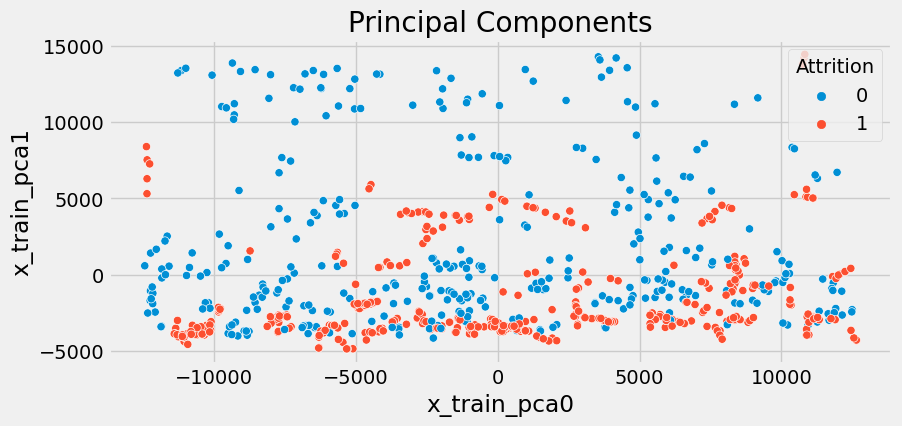

In [65]:
# let us plot the PCA

plt.rcParams['figure.figsize'] = (9,4)

plt.style.use('fivethirtyeight')

sns.scatterplot(df['x_train_pca0'],
               df['x_train_pca1'],
               hue = df['Attrition'])

plt.title('Principal Components')

plt.show()

## Introduction into T-SNE

t-SNE is a machine learning technique for dimentionality reduction that helps you to identify relevant patterns

The main advantange of t-SNE is the ability to preserve local structure.

It means, roughly, that points whch are close to on another in the high dimensional data set will tend to be close to one another in the chart

t-SNE also produces beautiful looking visualizations.

### setting Up Predictive Model

To understand the data. Although scanning raw data and calculating basic statistics can lead to some insights, nothing beat the chart.

Fitting multiple dimensions of data into a simple chart is always a challenge

where t-SNE (or, t-distributed stochastic neighbor embedding for long).

Conclude the t-SNe is the most preferably used for visualizing high Dimensional Datasets in simple charts.

## Working of the t-SNE Model

t-SNE algorithm models the probability distribution of neighbors around each point.

The term neighbors refers to the set of points which are closest to each point.

In the original, high-dimensional spaces this is modeled as a Gaussian distribution.

In the 2-dimensional output spaces this is modeled as a t-distribution.

The Goal of the  procedure is to find a mapping onto the 2-dimensional space that minimizes the difference between these two distributions over all points

The fatter tails of a t-distribution compared to a Gaussian helps to spread the points more evenly in the 2-dimensional space/.

The main parameter controlling the fitting is called Perplexity.

Perplexity is roughly equivalent to the number of nearest neighbors considered when matching the original and fitted distributions for each points.

A low perplexity means we care about local scale and focus on the closest other points. High perplexity takes more of a "big picture" approach.

t-SNE only works with the data it is given. It does not produce a model that you can then apply to new data.



In [76]:
# Implementing T-SNE 

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_train_tsne = tsne.fit_transform(x_train)
x_test_tsne = tsne.transform(x_test)   #it doesnt work

In [77]:
#lets create a predictive model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_tsne, y_train)
y_pred_tsne = model.predict(x_test_tsne)

cr = classification_report(y_pred_tsne, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.45      0.53       115
           1       0.47      0.66      0.55        87

    accuracy                           0.54       202
   macro avg       0.55      0.55      0.54       202
weighted avg       0.57      0.54      0.54       202



## Linear Discriminant Analysis

Linear Discriminant Analysis is a dimensionality reduction technique used as a preprocessing step in machine learning

It is a supervised classification technique which takes labels into consideration

LDA maximises the spaces between classes

The main goal of dimensionality reduction techniques is to reduce the dimensions by removing the redundant and dependent features by transformimg the features from higher dimensional spaces to a space with lower dimensions

Note: PCA was an unsupervised technique while LDA is a supervised technique

### Steps

Calculate the separability between different classes i.e. the distance between the mean of different classes also called as the between-class variance

Calculate the distance between the mean and sample of each class, which is called the within-class variance.

Compute the eigenvalues and corresponding eigenvectors for the scatter matrices

Sort the eigenvalues and select the top K.

Create a new matrix containing eigenvectors that map to the k eigenvalues

Obtain the new features i.e. LDA components by taking the dot product of the data and the matrix from the previous step.



In [84]:
# Implementing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Lets define the model
lda = LDA(n_components=None)
x_lda = lda.fit_transform(x_train, y_train)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

In [86]:
# Creating a function to to determine our best k
def select_n_components(var_ratio, goal_var: float) -> int:
    # set initial variance
    total_variance = 0.0
    
    # set initial number of features
    n_components = 0
    
    # for loop for the variance of each feature
    for explained_variance in var_ratio:
        
        # add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # if we reach our goal level of variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

# lets run the function
select_n_components(lda_var_ratios, 0.95)

1

In [89]:
# let redefine the model

lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [90]:
#lets create a predictive model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_lda, y_train)
y_pred_lda = model.predict(x_test_lda)

cr = classification_report(y_pred_lda, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        82
           1       0.83      0.83      0.83       120

    accuracy                           0.80       202
   macro avg       0.79      0.79      0.79       202
weighted avg       0.80      0.80      0.80       202



In [91]:
from PIL import Image
#img = Image.open('aivsdl.png')